In [1]:
# In[132]:
from IPython import get_ipython 
get_ipython().magic(u'matplotlib inline')
get_ipython().run_line_magic('matplotlib', 'inline')

# 
# # Diagnóstico Cancer de Mama usando uma Rede Neural MLP
# 
# Este é um exemplo do uso da biblioteca scikit-learn para treinar uma rede neural MLP e classificar pacientes 
# com tumores malignos ou benignos.
# 
# A base possui a seguinte distribuição:
# 
# - 212 pacientes da classe MALIGNO
# - 357 pacientes da classe BENINGNO
# 
# São 569 pacientes ao todo e 30 atributos descrevendo as características de cada paciente.

In [2]:
# In[133]:

print(__doc__)

# Importando matplotlib 
# O matplotlib é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays
import matplotlib.pyplot as plt 

# Importando conjunto de dados, classificadores e métricas de desempenho
# sklearn : aprendizado de máquina
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
#numpy: processamento de vetores multidimensionais
# panda: análise e manipulação dos dados
import numpy as np
import pandas as pd


# ## Base de Dados de Cancer
# 
# Vamos listas os nomes dos 30 atributos da base:

Automatically created module for IPython interactive environment


In [3]:
# In[134]:
#carrega conjunto de dados de cancer
#features: funcionalidades 
#labels:rotulos

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)

features = data.data
labels = data.target

num_features = features.shape[1]

print("Atributos: ", data.feature_names)
print(" ")
print("Classes: ", data.target_names)

# # Analisando Atributos (Histograma)

# 'raio médio' 'textura média' 'perímetro médio' 'área média'
# 'significa suavidade' 'significa compactação' 'significa concavidade'
#'significa pontos côncavos' 'significa simetria' 'significa dimensão fractal'
# 'erro de raio' 'erro de textura' 'erro de perímetro' 'erro de área'
# 'erro de suavidade' 'erro de compactação' 'erro de concavidade'
# 'erro de pontos côncavos' 'erro de simetria' 'erro de dimensão fractal'
# 'pior raio' 'pior textura' 'pior perímetro' 'pior área'
# 'pior suavidade' 'pior compactação' 'pior concavidade'
# 'piores pontos côncavos' 'pior simetria' 'pior dimensão fractal'

Atributos:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
 
Classes:  ['malignant' 'benign']


/tmp/ipykernel_8855/1731634834.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  x = data.data.hist(ax = ax)


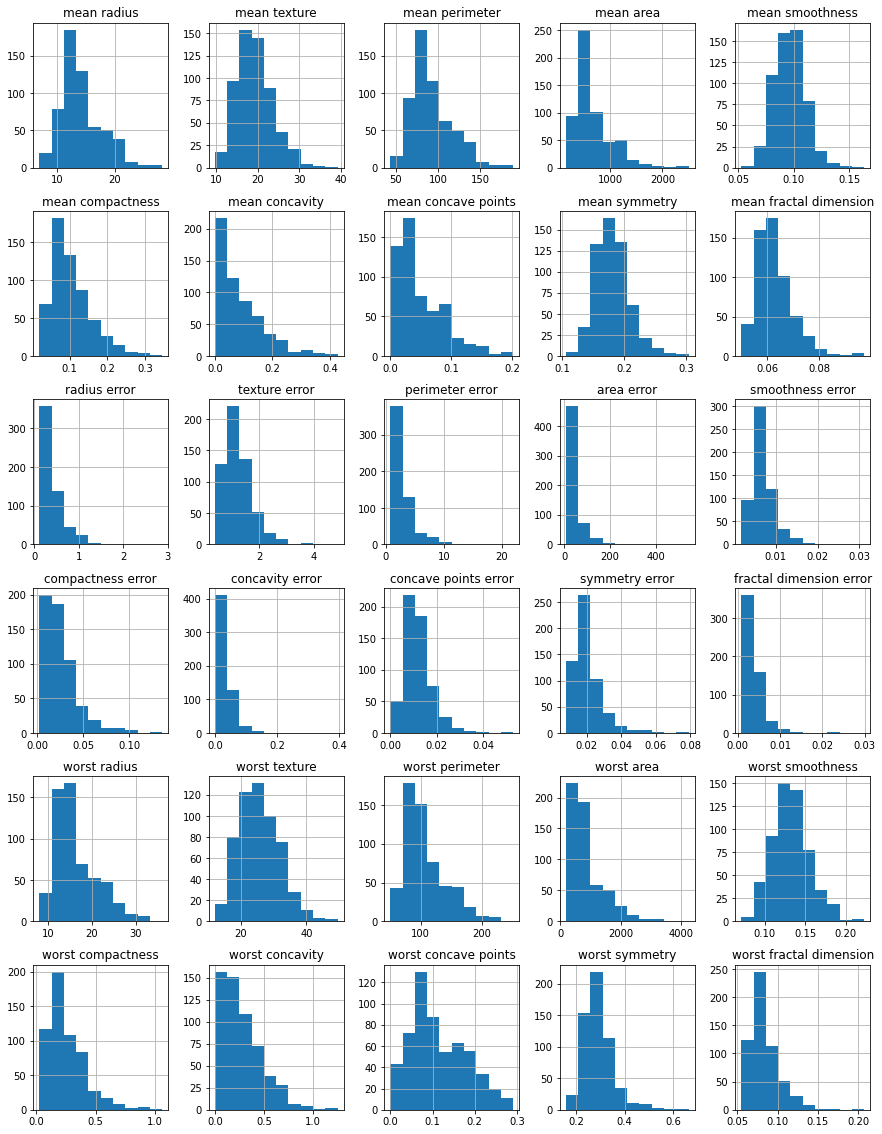

In [4]:
# In[135]:
#tamanho da figura
#gca: "obter eixos atuais"
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
x = data.data.hist(ax = ax)

# # Treinando o Modelo de Classificação
# 
# Agora criamos a rede MLP com a estrutura desejada e definimos seus hiperparâmetros de treinamento.
# Estes parâmetros são importantes pois irão definir a qualidade do resultado.
# 
# Podemos dividir os dados em subconjuntos de treinamento e teste e ajustar uma rede neural MLP 
# (Multilayer Perceptron). 
# O classificador após o ajuste poderá ser usado para prever a classe das amostras do subconjunto de teste.
# 
#A rede MLP possui 30 unidades de entrada, um número de camadas ocultas e neurônios em cada camada oculta definido 
#pelo usuário e 1 neurônio na camada de saída.

In [84]:
#In[136]:

# Criando uma rede MLP
# Definindo a rede:

# hidden_layer_sizes: tupla, tamanho = n_camadas - 2, default=(100,)
# alpha: float, default=0.0001
# learning_rate: {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
# learning_rate_init: double, default=0.001
# max_iter: int, default=200
# early_stopping: bool, default=False
# tol: float, default=1e-4

clf = MLPClassifier(verbose=True, max_iter=5000, tol=0.00000100, solver='adam',
                     activation='tanh', hidden_layer_sizes=(300), warm_start=True,
                     learning_rate_init=0.0001, shuffle=True, random_state=2, n_iter_no_change=20,
                     alpha=0.00001, beta_1=0.99, beta_2=0.99)

#clf = MLPClassifier(solver='lbfgs', alpha=0.0001, random_state=1, max_iter=2000,
#           early_stopping=True, hidden_layer_sizes=[100])

# ÓTIMOS RESULTADOS clf = MLPClassifier(max_iter=2500, verbose=True, tol=0.00000100, solver='adam',
#        ,  hidden_layer_sizes=(13,13), random_state=1)

# Dividindo o conjundo de Dados
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.15, shuffle=True)

# Treinar o modelo com o conjunto de treinamento, faz o ajuste dos pesos
clf.fit(X_train, y_train)



#(solver='', alpha=0.0001, , max_iter=2500, verbose=True,
#            tol=0.0000100, , hidden_layer_sizes=[100])

Iteration 1, loss = 0.96257576
Iteration 2, loss = 0.90110922
Iteration 3, loss = 0.84256909
Iteration 4, loss = 0.78867240
Iteration 5, loss = 0.74156288
Iteration 6, loss = 0.70012364
Iteration 7, loss = 0.66218316
Iteration 8, loss = 0.62864322
Iteration 9, loss = 0.60048956
Iteration 10, loss = 0.57573990
Iteration 11, loss = 0.55584136
Iteration 12, loss = 0.53916840
Iteration 13, loss = 0.52675741
Iteration 14, loss = 0.51685102
Iteration 15, loss = 0.50927291
Iteration 16, loss = 0.50174512
Iteration 17, loss = 0.49673714
Iteration 18, loss = 0.49334678
Iteration 19, loss = 0.49057991
Iteration 20, loss = 0.48923518
Iteration 21, loss = 0.48755908
Iteration 22, loss = 0.48672076
Iteration 23, loss = 0.48542679
Iteration 24, loss = 0.48418385
Iteration 25, loss = 0.48262087
Iteration 26, loss = 0.48041085
Iteration 27, loss = 0.47688065
Iteration 28, loss = 0.47414685
Iteration 29, loss = 0.47027026
Iteration 30, loss = 0.46625174
Iteration 31, loss = 0.46258541
Iteration 32, los

Iteration 260, loss = 0.20548121
Iteration 261, loss = 0.20516960
Iteration 262, loss = 0.20487590
Iteration 263, loss = 0.20458374
Iteration 264, loss = 0.20430974
Iteration 265, loss = 0.20414771
Iteration 266, loss = 0.20384685
Iteration 267, loss = 0.20369823
Iteration 268, loss = 0.20347417
Iteration 269, loss = 0.20335475
Iteration 270, loss = 0.20318607
Iteration 271, loss = 0.20302886
Iteration 272, loss = 0.20290388
Iteration 273, loss = 0.20274600
Iteration 274, loss = 0.20259592
Iteration 275, loss = 0.20247507
Iteration 276, loss = 0.20234376
Iteration 277, loss = 0.20217506
Iteration 278, loss = 0.20210266
Iteration 279, loss = 0.20196198
Iteration 280, loss = 0.20180174
Iteration 281, loss = 0.20165678
Iteration 282, loss = 0.20151297
Iteration 283, loss = 0.20129289
Iteration 284, loss = 0.20107035
Iteration 285, loss = 0.20088511
Iteration 286, loss = 0.20066580
Iteration 287, loss = 0.20040025
Iteration 288, loss = 0.20012562
Iteration 289, loss = 0.19994312
Iteration 

Iteration 541, loss = 0.16870325
Iteration 542, loss = 0.16863637
Iteration 543, loss = 0.16849021
Iteration 544, loss = 0.16845057
Iteration 545, loss = 0.16834444
Iteration 546, loss = 0.16820068
Iteration 547, loss = 0.16812022
Iteration 548, loss = 0.16805044
Iteration 549, loss = 0.16793258
Iteration 550, loss = 0.16786392
Iteration 551, loss = 0.16776171
Iteration 552, loss = 0.16765471
Iteration 553, loss = 0.16754007
Iteration 554, loss = 0.16741631
Iteration 555, loss = 0.16731935
Iteration 556, loss = 0.16726922
Iteration 557, loss = 0.16717982
Iteration 558, loss = 0.16707165
Iteration 559, loss = 0.16697198
Iteration 560, loss = 0.16682509
Iteration 561, loss = 0.16668858
Iteration 562, loss = 0.16659629
Iteration 563, loss = 0.16647473
Iteration 564, loss = 0.16638842
Iteration 565, loss = 0.16629037
Iteration 566, loss = 0.16620978
Iteration 567, loss = 0.16614166
Iteration 568, loss = 0.16599860
Iteration 569, loss = 0.16591883
Iteration 570, loss = 0.16586340
Iteration 

Iteration 793, loss = 0.14452897
Iteration 794, loss = 0.14449870
Iteration 795, loss = 0.14444308
Iteration 796, loss = 0.14424406
Iteration 797, loss = 0.14402738
Iteration 798, loss = 0.14384754
Iteration 799, loss = 0.14398153
Iteration 800, loss = 0.14412561
Iteration 801, loss = 0.14400481
Iteration 802, loss = 0.14398458
Iteration 803, loss = 0.14390061
Iteration 804, loss = 0.14377933
Iteration 805, loss = 0.14363747
Iteration 806, loss = 0.14332302
Iteration 807, loss = 0.14314136
Iteration 808, loss = 0.14296256
Iteration 809, loss = 0.14287894
Iteration 810, loss = 0.14275128
Iteration 811, loss = 0.14260123
Iteration 812, loss = 0.14257775
Iteration 813, loss = 0.14252996
Iteration 814, loss = 0.14244687
Iteration 815, loss = 0.14243459
Iteration 816, loss = 0.14231471
Iteration 817, loss = 0.14217878
Iteration 818, loss = 0.14191821
Iteration 819, loss = 0.14167837
Iteration 820, loss = 0.14163851
Iteration 821, loss = 0.14134394
Iteration 822, loss = 0.14131245
Iteration 

Iteration 1068, loss = 0.12131389
Iteration 1069, loss = 0.12114497
Iteration 1070, loss = 0.12108289
Iteration 1071, loss = 0.12091409
Iteration 1072, loss = 0.12075145
Iteration 1073, loss = 0.12063853
Iteration 1074, loss = 0.12055002
Iteration 1075, loss = 0.12047970
Iteration 1076, loss = 0.12039233
Iteration 1077, loss = 0.12044773
Iteration 1078, loss = 0.12025978
Iteration 1079, loss = 0.12014821
Iteration 1080, loss = 0.12017342
Iteration 1081, loss = 0.12007413
Iteration 1082, loss = 0.11989861
Iteration 1083, loss = 0.11983002
Iteration 1084, loss = 0.11979165
Iteration 1085, loss = 0.11979645
Iteration 1086, loss = 0.11969047
Iteration 1087, loss = 0.11974192
Iteration 1088, loss = 0.11961750
Iteration 1089, loss = 0.11946747
Iteration 1090, loss = 0.11924296
Iteration 1091, loss = 0.11928142
Iteration 1092, loss = 0.11912271
Iteration 1093, loss = 0.11906679
Iteration 1094, loss = 0.11892837
Iteration 1095, loss = 0.11881068
Iteration 1096, loss = 0.11871046
Iteration 1097

Iteration 1321, loss = 0.10062415
Iteration 1322, loss = 0.10041314
Iteration 1323, loss = 0.10026431
Iteration 1324, loss = 0.10012608
Iteration 1325, loss = 0.10003450
Iteration 1326, loss = 0.10006351
Iteration 1327, loss = 0.09988548
Iteration 1328, loss = 0.09982100
Iteration 1329, loss = 0.09973058
Iteration 1330, loss = 0.09978495
Iteration 1331, loss = 0.09964503
Iteration 1332, loss = 0.09950150
Iteration 1333, loss = 0.09932006
Iteration 1334, loss = 0.09915884
Iteration 1335, loss = 0.09904612
Iteration 1336, loss = 0.09913224
Iteration 1337, loss = 0.09922352
Iteration 1338, loss = 0.09936363
Iteration 1339, loss = 0.09949913
Iteration 1340, loss = 0.09930800
Iteration 1341, loss = 0.09901408
Iteration 1342, loss = 0.09914338
Iteration 1343, loss = 0.09857058
Iteration 1344, loss = 0.09878891
Iteration 1345, loss = 0.09902989
Iteration 1346, loss = 0.09896082
Iteration 1347, loss = 0.09870229
Iteration 1348, loss = 0.09831115
Iteration 1349, loss = 0.09840664
Iteration 1350

Iteration 1562, loss = 0.08434487
Iteration 1563, loss = 0.08341360
Iteration 1564, loss = 0.08220297
Iteration 1565, loss = 0.08174844
Iteration 1566, loss = 0.08219413
Iteration 1567, loss = 0.08331410
Iteration 1568, loss = 0.08365573
Iteration 1569, loss = 0.08307372
Iteration 1570, loss = 0.08230154
Iteration 1571, loss = 0.08168252
Iteration 1572, loss = 0.08107111
Iteration 1573, loss = 0.08142059
Iteration 1574, loss = 0.08144497
Iteration 1575, loss = 0.08148494
Iteration 1576, loss = 0.08140022
Iteration 1577, loss = 0.08078983
Iteration 1578, loss = 0.08058021
Iteration 1579, loss = 0.08080103
Iteration 1580, loss = 0.08083486
Iteration 1581, loss = 0.08094207
Iteration 1582, loss = 0.08088839
Iteration 1583, loss = 0.08054735
Iteration 1584, loss = 0.08041651
Iteration 1585, loss = 0.08034434
Iteration 1586, loss = 0.08075948
Iteration 1587, loss = 0.08090577
Iteration 1588, loss = 0.08067941
Iteration 1589, loss = 0.08026015
Iteration 1590, loss = 0.07992034
Iteration 1591

Iteration 1805, loss = 0.06548854
Iteration 1806, loss = 0.06679973
Iteration 1807, loss = 0.06795838
Iteration 1808, loss = 0.06832043
Iteration 1809, loss = 0.06663495
Iteration 1810, loss = 0.06614190
Iteration 1811, loss = 0.06603417
Iteration 1812, loss = 0.06736704
Iteration 1813, loss = 0.06858736
Iteration 1814, loss = 0.06769799
Iteration 1815, loss = 0.06606839
Iteration 1816, loss = 0.06429253
Iteration 1817, loss = 0.06584900
Iteration 1818, loss = 0.06691635
Iteration 1819, loss = 0.06746290
Iteration 1820, loss = 0.06628835
Iteration 1821, loss = 0.06496907
Iteration 1822, loss = 0.06487024
Iteration 1823, loss = 0.06565346
Iteration 1824, loss = 0.06691258
Iteration 1825, loss = 0.06681792
Iteration 1826, loss = 0.06554705
Iteration 1827, loss = 0.06440355
Iteration 1828, loss = 0.06475877
Iteration 1829, loss = 0.06631443
Iteration 1830, loss = 0.06743085
Iteration 1831, loss = 0.06716403
Iteration 1832, loss = 0.06590967
Iteration 1833, loss = 0.06409443
Iteration 1834

Iteration 2047, loss = 0.05471343
Iteration 2048, loss = 0.05423392
Iteration 2049, loss = 0.05409209
Iteration 2050, loss = 0.05536334
Iteration 2051, loss = 0.05546577
Iteration 2052, loss = 0.05500051
Iteration 2053, loss = 0.05408178
Iteration 2054, loss = 0.05419470
Iteration 2055, loss = 0.05501871
Iteration 2056, loss = 0.05588459
Iteration 2057, loss = 0.05572991
Iteration 2058, loss = 0.05454458
Iteration 2059, loss = 0.05360426
Iteration 2060, loss = 0.05450273
Iteration 2061, loss = 0.05631435
Iteration 2062, loss = 0.05732717
Iteration 2063, loss = 0.05633216
Iteration 2064, loss = 0.05466122
Iteration 2065, loss = 0.05340443
Iteration 2066, loss = 0.05463535
Iteration 2067, loss = 0.05578880
Iteration 2068, loss = 0.05624823
Iteration 2069, loss = 0.05502865
Iteration 2070, loss = 0.05391088
Iteration 2071, loss = 0.05336907
Iteration 2072, loss = 0.05535038
Iteration 2073, loss = 0.05619241
Iteration 2074, loss = 0.05565420
Iteration 2075, loss = 0.05393247
Iteration 2076

Iteration 2295, loss = 0.04608145
Iteration 2296, loss = 0.04616389
Iteration 2297, loss = 0.04574756
Iteration 2298, loss = 0.04538317
Iteration 2299, loss = 0.04508976
Iteration 2300, loss = 0.04535555
Iteration 2301, loss = 0.04579497
Iteration 2302, loss = 0.04555106
Iteration 2303, loss = 0.04523928
Iteration 2304, loss = 0.04507480
Iteration 2305, loss = 0.04544725
Iteration 2306, loss = 0.04548829
Iteration 2307, loss = 0.04524267
Iteration 2308, loss = 0.04488001
Iteration 2309, loss = 0.04521366
Iteration 2310, loss = 0.04563137
Iteration 2311, loss = 0.04585211
Iteration 2312, loss = 0.04529613
Iteration 2313, loss = 0.04507848
Iteration 2314, loss = 0.04484694
Iteration 2315, loss = 0.04515378
Iteration 2316, loss = 0.04527688
Iteration 2317, loss = 0.04494032
Iteration 2318, loss = 0.04471599
Iteration 2319, loss = 0.04463597
Iteration 2320, loss = 0.04496163
Iteration 2321, loss = 0.04506377
Iteration 2322, loss = 0.04479967
Iteration 2323, loss = 0.04455891
Iteration 2324

MLPClassifier(activation='tanh', alpha=1e-05, beta_1=0.99, beta_2=0.99,
              hidden_layer_sizes=300, learning_rate_init=0.0001, max_iter=5000,
              n_iter_no_change=20, random_state=2, tol=1e-06, verbose=True,
              warm_start=True)

In [85]:
# In[137]:

# Prever a classe do dígito com o subconjunto de teste
predicted = clf.predict(X_test)

# # Testando o Classificador
# 
# Exibindo o relatório de classificação da rede MLP para o subconjunto de teste. 
# 

print(f"Relatório de Classificação do {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

# # Matriz de Confusão do Classificador
# 
# Exibindo a matriz `confusion matrix <confusion_matrix>` dos valores reais e dos valores previstos. As linhas correspondem aos valores reais e as colunas aos valores previstos. A contagem de acertos em relação ao subconjunto dedados de teste mostrará na diagonal principal os acertos e nas demais posições os erros.
# 

Relatório de Classificação do MLPClassifier(activation='tanh', alpha=1e-05, beta_1=0.99, beta_2=0.99,
              hidden_layer_sizes=300, learning_rate_init=0.0001, max_iter=5000,
              n_iter_no_change=20, random_state=2, tol=1e-06, verbose=True,
              warm_start=True):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.98      0.98      0.98        53

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86




Matriz de Confusão:
[[32  1]
 [ 1 52]]


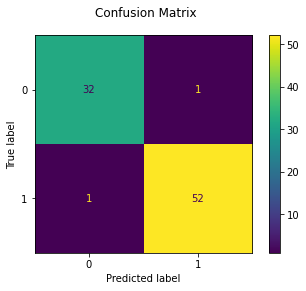

In [86]:
# In[138]:


disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Matriz de Confusão:\n{disp.confusion_matrix}")

plt.show()